<a href="https://colab.research.google.com/github/sofial47/senalesysistemas/blob/main/parcial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Instalación de librerías necesarias

En este bloque de código, se instalan las librerías externas requeridas para la simulación y visualización interactiva de sistemas dinámicos:



In [ ]:
#1
!pip install ipywidgets matplotlib numpy scipy
#Comando de terminal. Sirve para instalar librerías externas necesarias para ejecutar la simulación interactiva
#ipywidgets: Permite crear interfaces gráficas interactivas en notebooks, como sliders, checkboxes, botones, etc. Muy útil para que el usuario pueda elegir parámetros como ζ, ωn, etc
#matplotlib: Librería para graficar.Sirve para mostrar cómo cambia la posición, velocidad, aceleración, etc., del sistema en función del tiempo.
#numpy: Librería para trabajar con arreglos numéricos, operaciones vectoriales y matemáticas avanzadas
#scipy: Contiene funciones científicas, entre ellas solve_ivp, que permite resolver ecuaciones diferenciales.
!pip install control matplotlib numpy scipy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 8.6 MB/s eta 0:00:00


### Importación de librerías interactivas




In [ ]:
import ipywidgets as widgets
from IPython.display import display


## Simulación de un sistema masa-resorte-amortiguador con controles interactivos

Este bloque de código implementa un sistema dinámico de segundo orden que modela el comportamiento de un sistema masa-resorte-amortiguador. El objetivo es simular su respuesta y permitir al usuario modificar los parámetros claves (factor de amortiguamiento y frecuencia natural) mediante **controles interactivos**.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import ipywidgets as widgets
from IPython.display import display, clear_output

# ---- Función del sistema ----
def sistema(t, y, zeta, wn, F=1.0, m=1.0):
    return [y[1], -2*zeta*wn*y[1] - wn**2*y[0] + F/m]#zeta=factor de amortiguamiento ξ; el codigo devuelve la derivada del estado: -La velocidad (derivada del desplazamiento) -La aceleración (derivada de la velocidad); Pero en todo momento y solo tiene dos componentes: posición y velocidad. La aceleración no se guarda, solo se calcula al vuelo para ayudar al integrador.

# ---- Simulación y gráfico ----
def simular(zeta, wn, t_max=10):
    y0 = [0, 0]  # Condiciones iniciales: y(0)=0, y'(0)=0; y0=Posición y velocidad inicial; y(0) = 0 m, y'(0) = 0 m/s
    t_eval = np.linspace(0, t_max, 1000)
    sol = solve_ivp(sistema, [0, t_max], y0, t_eval=t_eval, args=(zeta, wn))#solve_ivp:resuelve el sistema de ecuaciones diferenciales ordinario, integra el sistema definido por mis ecuaciones diferenciales; t_eval=t_eval (el primero es el nombre del parámetro de la función, el segundo es el nombre de mi variable.): Arreglo con los puntos de tiempo en los que se desea obtener el resultado (e.g., np.linspace(0, t_max, 1000)); args=(zeta, wn): rgumentos adicionales que necesita la función sistema, en este caso el factor de amortiguamiento 𝜁 y la frecuencia natural 𝜔𝑛
    #el codigo integra 𝑦¨ para obtener 𝑦˙y luego y

    plt.figure(figsize=(8, 4))
    plt.plot(sol.t, sol.y[0], label=f'ζ = {zeta}, ωₙ = {wn}')# sol.t=arreglo con los tiempos evaluados. sol.t contiene 1000 puntos de tiempo, desde 0 hasta tmax; sol.y[0]=posición y(t) evaluada en cada tiempo t; # sol.t, sol.y[0]=posición vs. tiempo
    #sol.y[0] es un arreglo de valores de desplazamiento (posición) evaluados en cada instante de tiempo que aparece en sol.t.
    #ej: sol.t = arreglo de 1000 tiempos (suponemos t_max=10): [0, 0.01, 0.02, ..., 10]
    #sol.y[0] = arreglo de 1000 valores de desplazamiento y(t): [y(0), y(0.01), y(0.02), ..., y(10)]; me muestra es el desplazamiento en cada intervalo de tiempo
    plt.title('Respuesta del sistema masa-resorte-amortiguador')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Desplazamiento y(t)')
    plt.grid(True)
    plt.legend()
    plt.show()

# ---- Función que actualiza los widgets según el tipo ----
def actualizar_widget_tipo(tipo):
    if tipo == 'Subamortiguada':
        zeta_slider.min = 0.01
        zeta_slider.max = 0.99
        zeta_slider.step = 0.01#Define el paso mínimo del slider. Es decir, al mover el control, el valor cambiará de 0.01 en 0.01.
        #Ejemplo: 0.01, 0.02, 0.03, ..., 0.99, 1.00.
        zeta_slider.value = 0.3#Establece el valor inicial o actual del slider: ζ=0.3. Este es el valor del factor de amortiguamiento con el que inicia mi simulación
        zeta_slider.disabled = False#Asegura que el slider no esté deshabilitado, o sea, sí se puede mover.Si pusiera True, el usuario no podría modificarlo
    elif tipo == 'Crítico':
        zeta_slider.min = 0.99
        zeta_slider.max = 1.01
        zeta_slider.step = 0.01
        zeta_slider.value = 1.0
        zeta_slider.disabled = True  # No editable
    elif tipo == 'Sobreamortiguada':
        zeta_slider.min = 1.01
        zeta_slider.max = 3.0
        zeta_slider.step = 0.01
        zeta_slider.value = 1.5
        zeta_slider.disabled = False
    elif tipo == 'Inestable':
        zeta_slider.min = -2.0
        zeta_slider.max = -0.01
        zeta_slider.step = 0.01
        zeta_slider.value = -0.3
        zeta_slider.disabled = False


# ---- Widgets interactivos ----
tipo_selector = widgets.Dropdown(
    options=['Subamortiguada', 'Crítico', 'Sobreamortiguada', 'Inestable'],
    value='Subamortiguada',
    description='Tipo:',
)

zeta_slider = widgets.FloatSlider( #control deslizante (slider interactivo) usando ipywidgets, que sirve para ajustar el valor del factor de amortiguamiento 𝜁 del sistema masa-resorte-amortiguador
    value=0.3,
    min=0.01,#valor minimo permitido de 𝜁
    max=0.99,#valor maximo permitido de 𝜁
    step=0.01, #Tamaño de incremento cuando muevo el slider (de 0.01 en 0.01)
    description='ζ (amort.):',
    continuous_update=False #El valor solo se actualiza cuando el usuario suelta el mouse, no mientras lo arrastra. Esto mejora el rendimiento en simulaciones complejas.
)

wn_slider = widgets.FloatSlider(
    value=10.0,
    min=1.0,
    max=30.0,
    step=0.5,
    description='ωₙ (rad/s):',
    continuous_update=False
)

# ---- Acción al cambiar tipo ----# no he mirado esta parte (no la he entendido)
def on_tipo_change(change):
    actualizar_widget_tipo(change['new'])

tipo_selector.observe(on_tipo_change, names='value')

# ---- Visualización interactiva ----
ui = widgets.VBox([tipo_selector, zeta_slider, wn_slider])
out = widgets.interactive_output(simular, {'zeta': zeta_slider, 'wn': wn_slider})
display(ui, out)


Output()

## Simulación Interactiva de un Sistema Masa-Resorte-Amortiguador con Análisis Temporal y Frecuencial

En este bloque se simula un sistema masa-resorte-amortiguador usando la biblioteca `control`, que permite trabajar con funciones de transferencia. Además, se incorporan controles interactivos mediante `ipywidgets` para modificar los parámetros del sistema en tiempo real. También se calculan y visualizan las respuestas al impulso, escalón y rampa, los diagramas de Bode, el mapa de polos y ceros, y los parámetros temporales de interés.

---

### Instalación de librerías necesarias

```python
!pip install control ipywidgets --quiet


In [ ]:
!pip install control ipywidgets --quiet

import numpy as np
import matplotlib.pyplot as plt
import control as ctl #Sirve para simular sistemas dinamicos masa-resorte; permite trabajar con: funciones de transferencia, Diagramas de Bode, polos y ceros, Respuestas al impulso, escalón, rampa, Cálculo de parámetros temporales
import ipywidgets as widgets
from IPython.display import display, clear_output

# Sliders de entrada
zeta_slider = widgets.FloatSlider(
    value=0.3, min=0.01, max=1.5, step=0.01,
    description='ζ (amort.):', continuous_update=False)

wn_slider = widgets.FloatSlider(
    value=2.0, min=0.5, max=10.0, step=0.1,
    description='ωn:', continuous_update=False)

masa_slider = widgets.FloatSlider(
    value=1.0, min=0.1, max=10.0, step=0.1,
    description='Masa (kg):', continuous_update=False)

# Función de simulación
def simular_sistema(zeta, wn, m):
    clear_output(wait=True)#cada vez que el usuario cambia un parámetro (como ζ o 𝜔𝑛): Se limpia la gráfica anterior, Se muestra solo la nueva gráfica actualizada
    display(zeta_slider, wn_slider, masa_slider)

    # Funciones de transferencia
    H_abierto = ctl.tf([wn**2], [1, 2*zeta*wn, wn**2])#Es mi H(s)=wn^2/(s^2)+2ζwns+wn^2; ese [1,..] representa el valor al lado de mi s^2, si fuera 2 seria: 2s^2
    H_cerrado = ctl.feedback(H_abierto, 1)

    t = np.linspace(0, 10, 1000)
    rampa = t

    # Respuestas
    t_imp, y_imp = ctl.impulse_response(H_abierto)
    t_imp_c, y_imp_c = ctl.impulse_response(H_cerrado)

    t_step, y_step = ctl.step_response(H_abierto)
    t_step_c, y_step_c = ctl.step_response(H_cerrado)

    t_rampa, y_rampa = ctl.forced_response(H_abierto, T=t, U=rampa)
    t_rampa_c, y_rampa_c = ctl.forced_response(H_cerrado, T=t, U=rampa)

    # Respuestas temporales
    fig, axs = plt.subplots(3, 2, figsize=(12, 8))
    fig.suptitle(f"ζ = {zeta}, ωn = {wn}", fontsize=16)

    axs[0, 0].plot(t_imp, y_imp); axs[0, 0].set_title("Impulso (Lazo Abierto)"); axs[0, 0].grid()
    axs[0, 1].plot(t_imp_c, y_imp_c); axs[0, 1].set_title("Impulso (Lazo Cerrado)"); axs[0, 1].grid()
    axs[1, 0].plot(t_step, y_step); axs[1, 0].set_title("Escalón (Lazo Abierto)"); axs[1, 0].grid()
    # Obtener información temporal
    info = ctl.step_info(H_abierto)
    # Etiquetas sobre la gráfica
    axs[1, 0].axvline(info['RiseTime'], color='green', linestyle='--', label='RiseTime')
    axs[1, 0].axvline(info['PeakTime'], color='orange', linestyle='--', label='PeakTime')
    axs[1, 0].axvline(info['SettlingTime'], color='purple', linestyle='--', label='SettlingTime')
    axs[1, 0].plot(info['PeakTime'], max(y_step_c), 'ro', label='Overshoot')
    # Texto anotado
    axs[1, 0].annotate(f"{info['RiseTime']:.2f}s", (info['RiseTime'], 0.1), color='green')
    axs[1, 0].annotate(f"{info['PeakTime']:.2f}s", (info['PeakTime'], max(y_step_c)+0.05), color='orange')
    axs[1, 0].annotate(f"{info['SettlingTime']:.2f}s", (info['SettlingTime'], 0.1), color='purple')
    axs[1, 0].annotate(f"{info['Overshoot']:.1f}%", (info['PeakTime'], max(y_step_c)), color='red')
    axs[1, 0].legend()

    axs[1, 1].plot(t_step_c, y_step_c); axs[1, 1].set_title("Escalón (Lazo Cerrado)"); axs[1, 1].grid()
    # Obtener información temporal
    info = ctl.step_info(H_cerrado)
    # Etiquetas sobre la gráfica
    axs[1, 1].axvline(info['RiseTime'], color='green', linestyle='--', label='RiseTime')#Risetime: Tiempo de levantamiento
    axs[1, 1].axvline(info['PeakTime'], color='orange', linestyle='--', label='PeakTime') #Peaktime: Tiempo en el que ocurre el sobreimpulso
    axs[1, 1].axvline(info['SettlingTime'], color='purple', linestyle='--', label='SettlingTime') # SettlingTime: Tiempo de establecimiento
    axs[1, 1].plot(info['PeakTime'], max(y_step_c), 'ro', label='Overshoot')
    # Texto anotado
    axs[1, 1].annotate(f"{info['RiseTime']:.2f}s", (info['RiseTime'], 0.1), color='green')
    axs[1, 1].annotate(f"{info['PeakTime']:.2f}s", (info['PeakTime'], max(y_step_c)+0.05), color='orange')
    axs[1, 1].annotate(f"{info['SettlingTime']:.2f}s", (info['SettlingTime'], 0.1), color='purple')
    axs[1, 1].annotate(f"{info['Overshoot']:.1f}%", (info['PeakTime'], max(y_step_c)), color='red')# Overshoot: Sobreimpulso máximo
    axs[1, 1].legend()

    axs[2, 0].plot(t_rampa, y_rampa); axs[2, 0].set_title("Rampa (Lazo Abierto)"); axs[2, 0].grid()
    axs[2, 1].plot(t_rampa_c, y_rampa_c); axs[2, 1].set_title("Rampa (Lazo Cerrado)"); axs[2, 1].grid()

    # Cálculo de constantes físicas
    k = wn**2 * m
    c = 2 * zeta * np.sqrt(k * m)

    # Equivalente eléctrico
    L = m
    R = c
    C = 1 / k

    print("\n🔧 Parámetros del Sistema Físico:")
    print(f"Masa (m): {m:.4f} kg")
    print(f"Constante del resorte (k): {k:.4f} N/m")
    print(f"Coef. amortiguador (c): {c:.4f} Ns/m")

    print("\n⚡️ Parámetros del Sistema Eléctrico Equivalente (paralelo):")
    print(f"Inductancia (L): {L:.4f} H")
    print(f"Resistencia (R): {R:.4f} Ω")
    print(f"Capacitancia (C): {C:.6f} F")


    plt.tight_layout()
    plt.show()

    # Diagramas de Bode
    plt.figure(figsize=(8, 4))
    ctl.bode_plot(H_abierto, dB=True, label='Lazo Abierto')
    ctl.bode_plot(H_cerrado, dB=True, label='Lazo Cerrado')
    plt.suptitle("Diagramas de Bode (Ambos Sistemas)")
    plt.legend()
    plt.show()

    # Polos y ceros
    plt.figure()
    ctl.pzmap(H_abierto, title="Polos y Ceros (Lazo Abierto)", grid=True)
    plt.show()

    plt.figure()
    ctl.pzmap(H_cerrado, title="Polos y Ceros (Lazo Cerrado)", grid=True)
    plt.show()

    # Parámetros temporales
    print("\n📊 Parámetros Temporales (Respuesta Escalón):\n")

    info_abierto = ctl.step_info(H_abierto)
    print("🔓 Lazo Abierto:")
    for key, value in info_abierto.items():
        print(f"  {key}: {value:.4f}")

    print("\n🔒 Lazo Cerrado:")
    info_cerrado = ctl.step_info(H_cerrado)
    for key, value in info_cerrado.items():
        print(f"  {key}: {value:.4f}")

# Interactividad
ui = widgets.VBox([zeta_slider, wn_slider, masa_slider])
out = widgets.interactive_output(simular_sistema, {'zeta': zeta_slider, 'wn': wn_slider, 'm': masa_slider})
display(ui, out)


Output()

#2


# Modulación y Demodulación AM en Banda Lateral Única (SSB-AM)

---

## 1. Dominio del Tiempo

Sea la señal moduladora:

$
m(t) = A_m \cos(2\pi f_m t)
$

Y la portadora:

$
c(t) = A_c \cos(2\pi f_c t)
$

---

### Modulación DSB-SC (base para SSB)

$
s_{\text{DSB}}(t) = m(t) \cdot c(t) = A_m A_c \cos(2\pi f_m t) \cos(2\pi f_c t)
$

Usando identidades trigonométricas:

$
s_{\text{DSB}}(t) = \frac{A_m A_c}{2} \left[\cos(2\pi (f_c + f_m)t) + \cos(2\pi (f_c - f_m)t)\right]
$

---

###  Modulación SSB

En modulación SSB, se elimina una de las bandas laterales usando la transformada de Hilbert.

El modelo general de modulación SSB en el tiempo es:

$
s_{\text{SSB}}(t) = m(t) \cos(2\pi f_c t) - \hat{m}(t) \sin(2\pi f_c t)
$

donde:

- $\hat{m}(t): transformada de Hilbert de m(t)$

---

## 2. Dominio de la Frecuencia

Sea $M(f)$ la transformada de Fourier de $m(t)$:

### DSB-SC:

$
S_{\text{DSB}}(f) = \frac{A_c}{2} \left[ M(f - f_c) + M(f + f_c) \right]
$

### SSB (sólo banda superior):

$
S_{\text{SSB}}(f) = M(f - f_c)
$

### SSB (sólo banda inferior):

$
S_{\text{SSB}}(f) = M(f + f_c)
$

> En SSB el ancho de banda se reduce a la mitad respecto a DSB.

---

## 3. Demodulación SSB

### a. Demodulación coherente

Multiplicamos la señal por una portadora sincronizada:

$
s_{\text{SSB}}(t) \cdot \cos(2\pi f_c t)
$

Aplicamos un filtro pasa-bajas para obtener la señal original:

$
\Rightarrow m(t)
$

---

##  Resumen

| Proceso            | Dominio del Tiempo                                               | Dominio de la Frecuencia                      |
|--------------------|------------------------------------------------------------------|-----------------------------------------------|
| **Modulación SSB** | $ m(t)\cos(2\pi f_c t) - \hat{m}(t)\sin(2\pi f_c t)  $         | $ M(f - f_c)  o  M(f + f_c)  $          |
| **Demodulación**   | $ s(t) \cdot \cos(2\pi f_c t) \rightarrow \text{LPF}   $       | Recuperación del contenido en baja frecuencia |

---


Modo: Audio de YouTube. Descargando de https://www.youtube.com/watch?v=0LTg8gYVFxM
Audio descargado. Duración: 5.0000 s, fs: 44100 Hz
Procesando con fc = 10000 Hz
Generando gráficas...


/tmp/ipython-input-8-1185099707.py:185: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-8-1185099707.py:185: UserWarning: Glyph 128312 (\N{SMALL ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-8-1185099707.py:185: UserWarning: Glyph 128315 (\N{DOWN-POINTING RED TRIANGLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128312 (\N{SMALL ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128315 (\N{DOWN-POINTING RED TRIANGLE}) missing from font(s) 

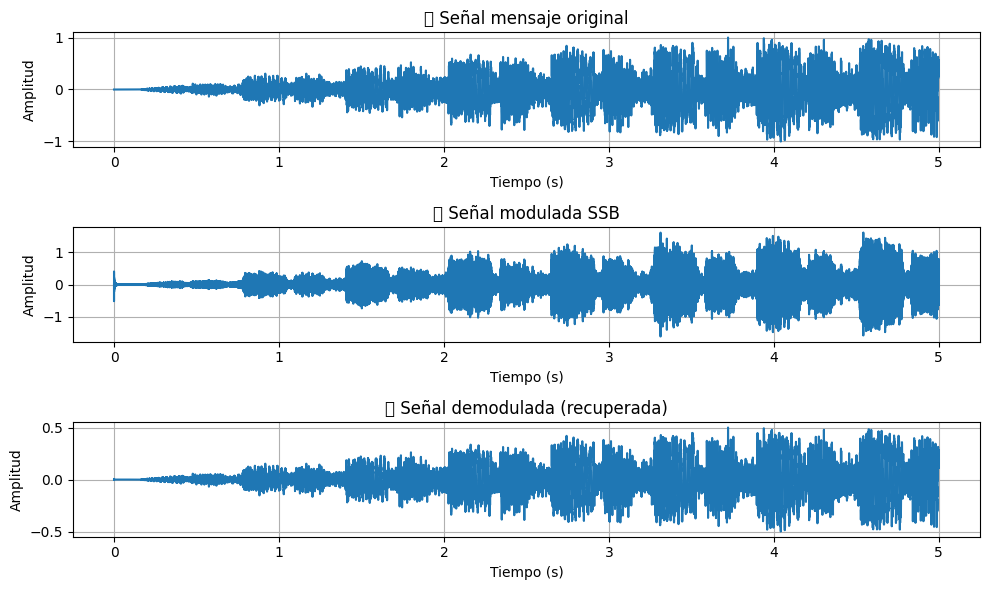

Generando audios...
🔈 Señal original:


🔈 Señal demodulada:


In [8]:
# ===========================
# 🔧 CONFIGURACIÓN INICIAL
# ===========================
import numpy as np  # Librería para operaciones numéricas
import matplotlib.pyplot as plt  # Para graficar
from scipy.signal import hilbert, butter, filtfilt  # Procesamiento de señales
from scipy.io import wavfile  # Para leer archivos de audio WAV
from IPython.display import Audio, display  # Para reproducir audio en Colab
from pydub import AudioSegment  # Para manipular archivos de audio
import yt_dlp  # Para descargar audio desde YouTube
import os, tempfile  # Para crear archivos/carpetas temporales

# ====================================
# 🎵 FUNCIÓN PARA CARGAR AUDIO DE YOUTUBE
# ====================================
def cargar_audio_youtube(url, duracion=5, fs_objetivo=44100):
    # Crear carpeta temporal
    temp_dir = tempfile.mkdtemp()
    salida_wav = os.path.join(temp_dir, "audio.wav")

    # Configuración de descarga para yt_dlp
    ydl_opts = {
        'format': 'bestaudio/best',
        'outtmpl': os.path.join(temp_dir, "audio.%(ext)s"),
        'quiet': True,
        'postprocessors': [{
            'key': 'FFmpegExtractAudio',
            'preferredcodec': 'wav',
            'preferredquality': '192',
        }],
        'nocheckcertificate': True,
        'logtostderr': False,
        'no_warnings': True,
        'default_search': 'ytsearch',
    }

    # Intentar descargar audio desde YouTube
    try:
        with yt_dlp.YoutubeDL(ydl_opts) as ydl:
            ydl.download([url])
    except Exception as e:
        print(f"Error durante la descarga de YouTube: {e}")
        return None, None

    # Procesamiento del audio descargado
    try:
        # Leer archivo WAV generado
        audio = AudioSegment.from_file(salida_wav)
        audio = audio.set_channels(1).set_frame_rate(fs_objetivo)  # Mono y con fs deseado
        audio = audio[:duracion * 1000]  # Cortar duración
        audio.export(salida_wav, format="wav")  # Guardar procesado

        fs, data = wavfile.read(salida_wav)

        # Asegurar que los datos estén en tipo float para evitar errores
        if data.dtype != np.float32 and data.dtype != np.float64:
            data = data.astype(np.float32)

        # Normalizar si no está vacío
        max_abs_data = np.max(np.abs(data))
        if max_abs_data > 0:
            data = data / max_abs_data
        else:
            data = np.zeros_like(data)  # Si es plano, poner ceros

        return fs, data

    except Exception as e:
        print(f"Error durante el procesamiento del audio: {e}")
        return None, None
    finally:
        # Borrar carpeta temporal
        if os.path.exists(temp_dir):
            import shutil
            shutil.rmtree(temp_dir)

# ====================================
# 📡 FUNCIÓN DE MODULACIÓN Y DEMODULACIÓN SSB
# ====================================
def ssb_mod_demod(m, fs, fc=10000):
    # Validar que la señal no sea nula
    if m is None or fs is None:
        print("No se pudo procesar la señal de entrada para SSB.")
        t = np.linspace(0, 1, 100)
        zeros = np.zeros_like(t)
        return t, zeros, zeros, zeros

    # Crear vector de tiempo y centrar señal (evita componente DC)
    t = np.arange(0, len(m)) / fs
    m = m - np.mean(m)

    # -------- Modulación SSB --------
    try:
        m_hilbert = np.imag(hilbert(m))  # Transformada de Hilbert
        # Fórmula de modulación SSB (Banda lateral única)
        ssb = m * np.cos(2 * np.pi * fc * t) - m_hilbert * np.sin(2 * np.pi * fc * t)
    except Exception as e:
        print(f"Error durante la modulación SSB: {e}")
        zeros = np.zeros_like(t)
        return t, m, zeros, zeros

    # -------- Demodulación coherente --------
    try:
        demod = ssb * np.cos(2 * np.pi * fc * t)  # Multiplicación por coseno

        # Filtro pasa bajos
        nyquist = 0.5 * fs
        normal_cutoff = fc / nyquist
        if normal_cutoff > 1:
            print(f"Advertencia: frecuencia de corte mayor a Nyquist. Ajustando.")
            normal_cutoff = 1.0

        b, a = butter(5, normal_cutoff, btype='low')  # Filtro de orden 5
        m_rec = filtfilt(b, a, demod)  # Filtrado sin retardo

    except Exception as e:
        print(f"Error durante la demodulación o filtrado: {e}")
        return t, m, ssb, np.zeros_like(t)

    return t, m, ssb, m_rec

# ====================================
# 🎚 PARÁMETROS DEL USUARIO
# ====================================
modo = "Audio de YouTube"  # Modo: "Pulso rectangular" o "Audio de YouTube"
url_youtube = "https://www.youtube.com/watch?v=0LTg8gYVFxM"  # URL del audio
fc = 10000  # Frecuencia portadora

# ====================================
# CARGAR SEÑAL SEGÚN MODO SELECCIONADO
# ====================================
if modo == "Pulso rectangular":
    fs = 44100
    t = np.linspace(0, 0.05, int(fs * 0.05))
    m = np.where((t >= 0.01) & (t <= 0.04), 1, 0)  # Pulso entre 0.01 y 0.04 s
    print("Modo: Pulso rectangular")
    print(f"Duración: {len(t)/fs:.4f} s, Frecuencia de muestreo: {fs} Hz")

elif modo == "Audio de YouTube":
    print(f"Modo: Audio de YouTube. Descargando de {url_youtube}")
    fs, m = cargar_audio_youtube(url_youtube)
    if m is not None:
        print(f"Audio descargado. Duración: {len(m)/fs:.4f} s, fs: {fs} Hz")
    else:
        print("No se pudo cargar el audio.")

else:
    print("Modo no reconocido. Usando señal vacía.")
    fs = 44100
    t = np.linspace(0, 1, fs)
    m = np.zeros_like(t)

# ====================================
# PROCESAMIENTO DE SEÑAL
# ====================================
if m is not None and fs is not None and len(m) > 0:
    print(f"Procesando con fc = {fc} Hz")
    t, m_orig, ssb, m_rec = ssb_mod_demod(m, fs, fc)

    # ---------- GRÁFICAS ----------
    print("Generando gráficas...")
    plt.figure(figsize=(10, 6))

    plt.subplot(3, 1, 1)
    plt.plot(t, m_orig)
    plt.title("🔹 Señal mensaje original")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud")
    plt.grid()

    plt.subplot(3, 1, 2)
    plt.plot(t, ssb)
    plt.title("🔸 Señal modulada SSB")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud")
    plt.grid()

    plt.subplot(3, 1, 3)
    plt.plot(t, m_rec)
    plt.title("🔻 Señal demodulada (recuperada)")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud")
    plt.grid()

    plt.tight_layout()
    plt.show()

    # ---------- AUDIOS ----------
    print("Generando audios...")
    print("🔈 Señal original:")
    display(Audio(m_orig, rate=fs))

    print("🔈 Señal demodulada:")
    display(Audio(m_rec, rate=fs))

else:
    print("No hay señal para procesar. Revisa el modo o la URL.")


#  Modulación y Demodulación SSB-AM en Python

Implementa un sistema completo de **modulación y demodulación SSB-AM (Single Side Band Amplitude Modulation)**. Su propósito es ilustrar cómo se puede transmitir eficientemente una señal (mensaje) eliminando la portadora y una de las bandas laterales, lo cual reduce el uso de ancho de banda.

---

## ¿Qué hace el código?

1. **Carga de señal**:
   - Puede usar un pulso rectangular generado artificialmente o descargar un segmento de audio desde YouTube (5 segundos).
   - Se normaliza el audio y se prepara para procesamiento.

2. **Modulación SSB**:
   - Se aplica la **transformada de Hilbert** para obtener la versión en cuadratura de la señal.
   - Se combina la señal con una portadora para obtener la señal modulada en banda lateral única.

3. **Demodulación SSB**:
   - Se realiza una **demodulación coherente**, multiplicando por la misma portadora.
   - Luego se usa un **filtro pasa bajos** para recuperar la señal original.

4. **Visualización y reproducción**:
   - Se grafican: la señal original, la modulada y la demodulada.
   - Se reproducen los audios para comparar entrada y salida.

---

Este experimento permite:
- Comprender visual y auditivamente cómo funciona la modulación SSB.
- Comparar la señal original con la recuperada.
- Ver cómo se puede ahorrar ancho de banda y energía al eliminar la portadora y una de las bandas.

